
Bayesian model selection demo for polynomial regression

This illustrates that if we have more data, Bayes picks a more complex model.

Based on a demo by Zoubin Ghahramani

Authors: Duane Rich (@Duane321), Gerardo Durán-Martín (@gerdm)


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [72]:
def posterior_linreg(X, y, alpha, beta):
    N, M = X.shape
    m0 = np.zeros(M)
    S0_inv = alpha * np.eye(M)
    SN_inv = S0_inv + beta * X.T @ X
    SN = np.linalg.inv(SN_inv)
    mN = SN @ (S0_inv @ m0 + beta * X.T @ y)
    _, logdetSN = np.linalg.slogdet(SN)
    logL = (
        M * np.log(alpha)
        + N * np.log(beta)
        -(y - X @ mN) @ (y - X @ mN)
        - M * np.log(2 * np.pi)
        - alpha * mN @ mN
        + logdetSN
    ) / 2

    return mN, SN, logL


def generate_data(N, seed):
    np.random.seed(seed)
    x_train = np.random.uniform(0, 20, N)
    noise = np.random.normal(size=N)
    y_train = (x_train - 4.0) ** 2 + 5 * noise

    x_true = np.linspace(-2, 50.1, 10000)
    y_true = (x_true - 4.0) ** 2
    return (x_train, y_train), (x_true, y_true)

/var/folders/75/_0h54l8n6ys6k7klg1v8zggh0000gn/T/ipykernel_2599/1605081892.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()
/var/folders/75/_0h54l8n6ys6k7klg1v8zggh0000gn/T/ipykernel_2599/1605081892.py:33: RuntimeWarning: invalid value encountered in divide
  L_norm = L_norm / L_norm.sum()
/var/folders/75/_0h54l8n6ys6k7klg1v8zggh0000gn/T/ipykernel_2599/1605081892.py:33: RuntimeWarning: invalid value encountered in divide
  L_norm = L_norm / L_norm.sum()
/var/folders/75/_0h54l8n6ys6k7klg1v8zggh0000gn/T/ipykernel_2599/1605081892.py:33: RuntimeWarning: invalid value encountered in divide
  L_norm = L_norm / L_norm.sum()


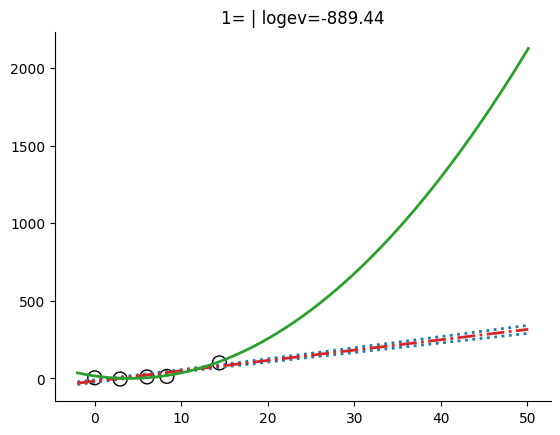

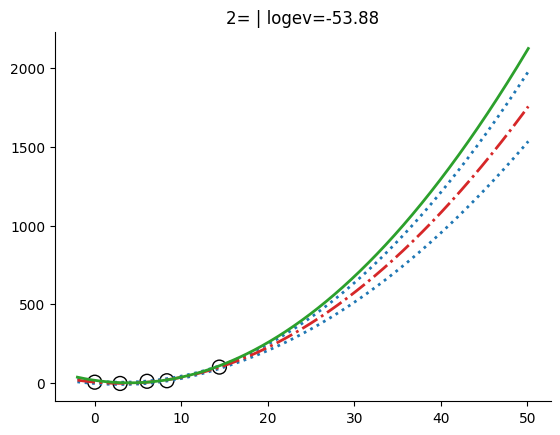

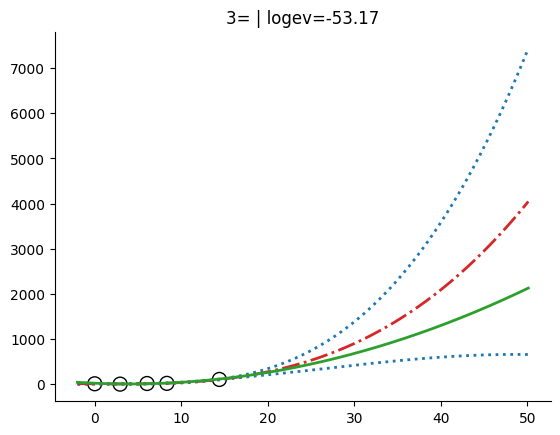

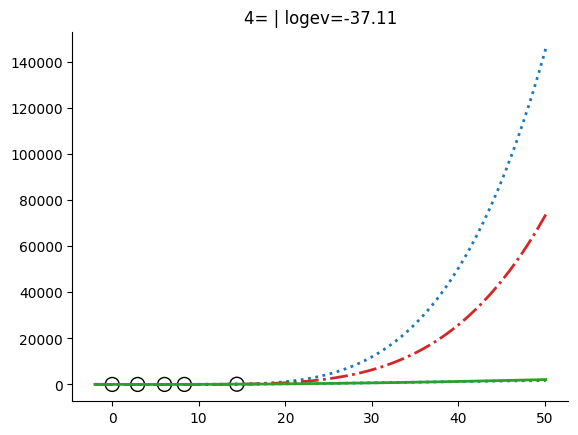

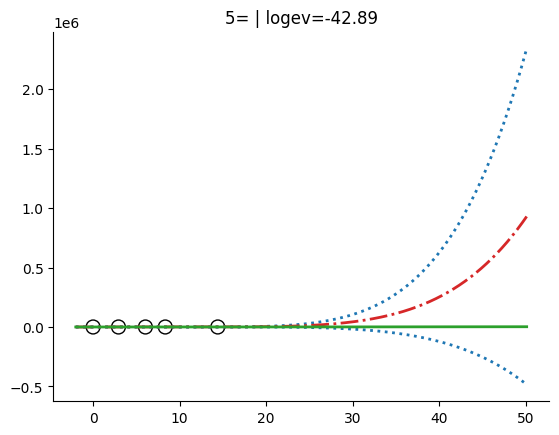

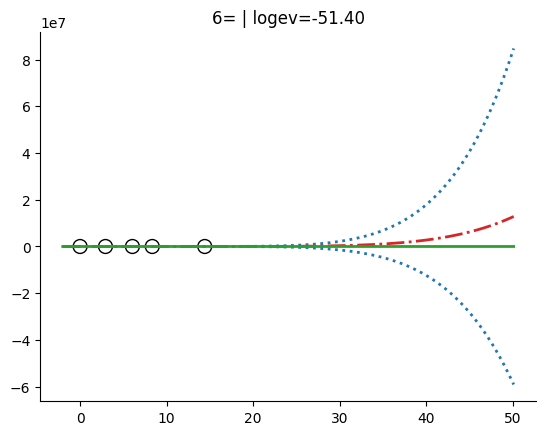

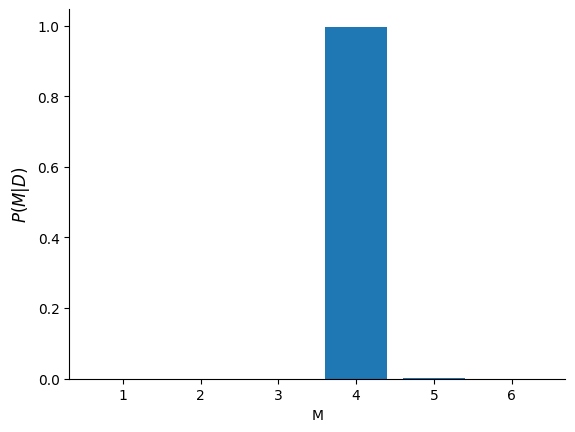

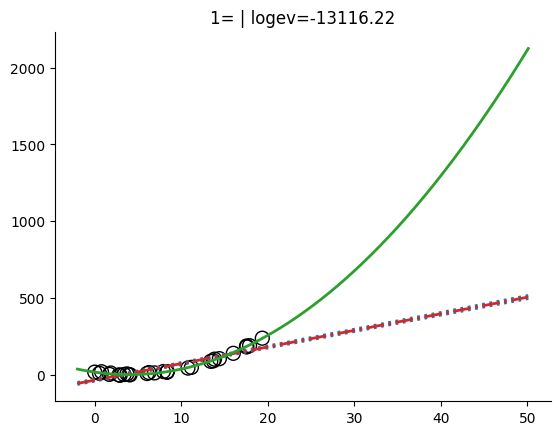

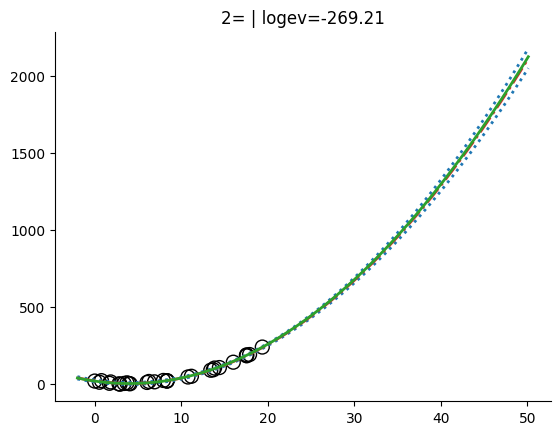

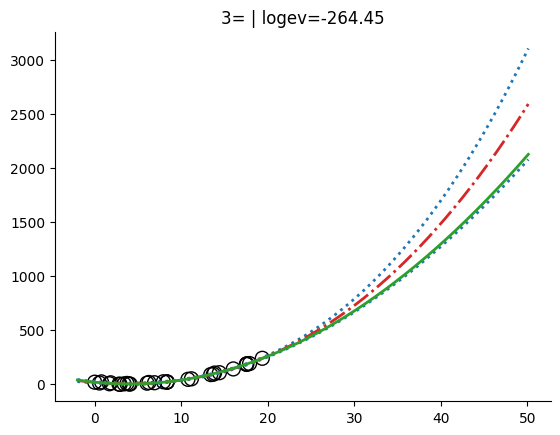

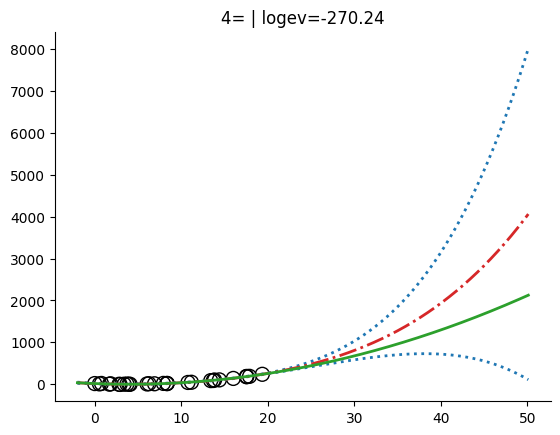

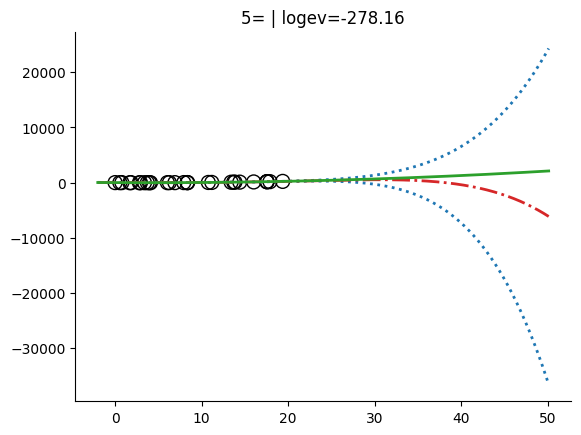

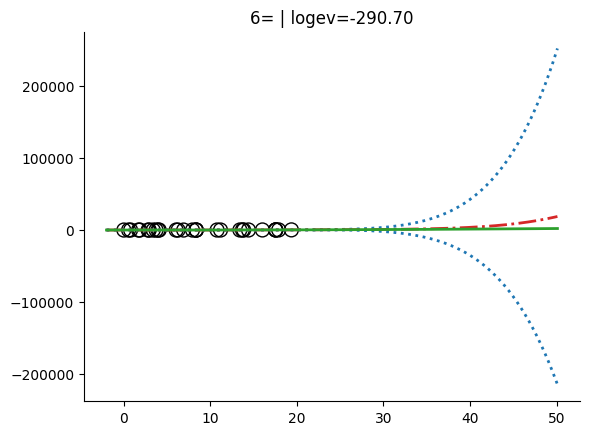

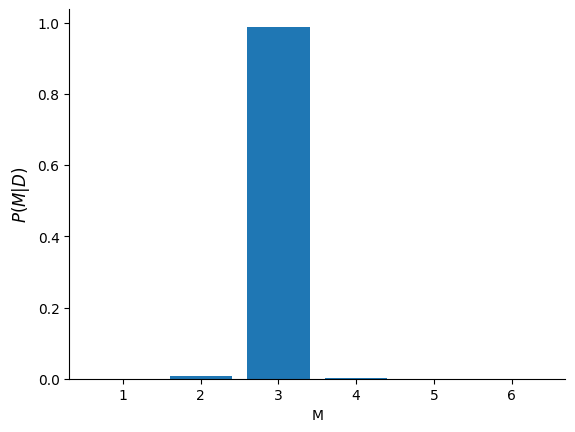

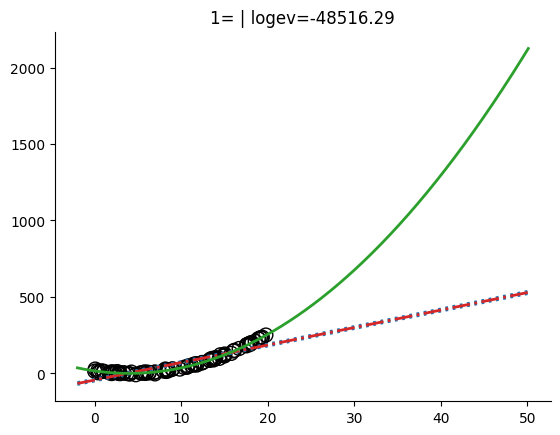

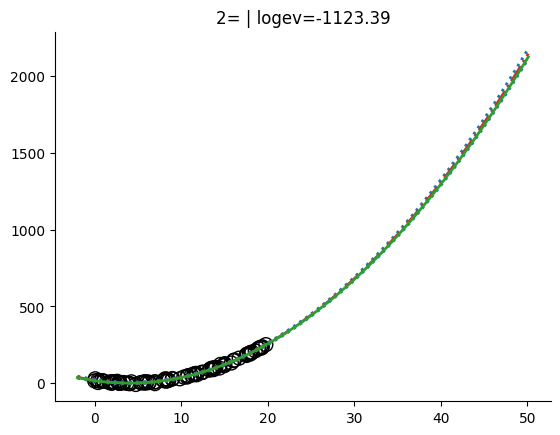

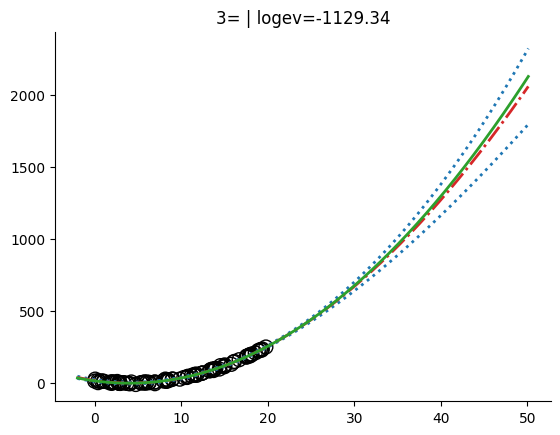

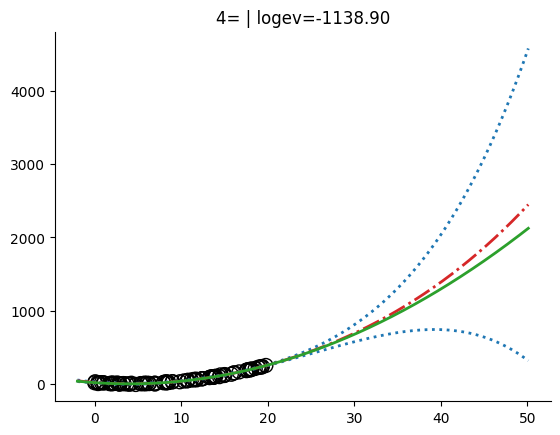

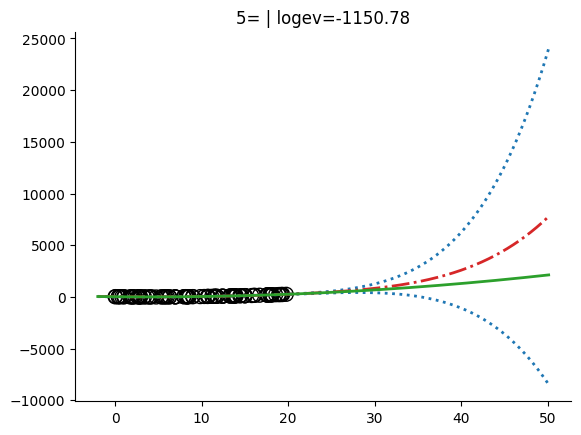

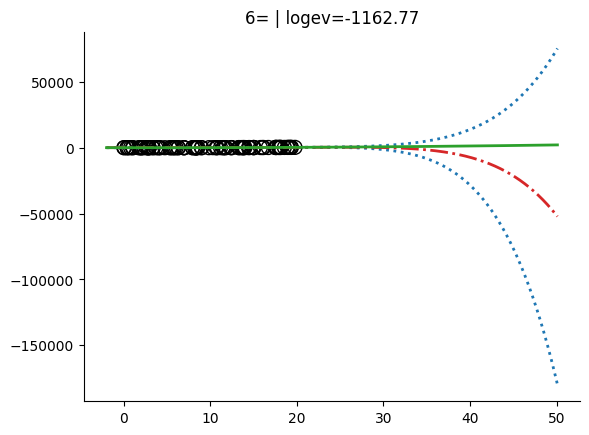

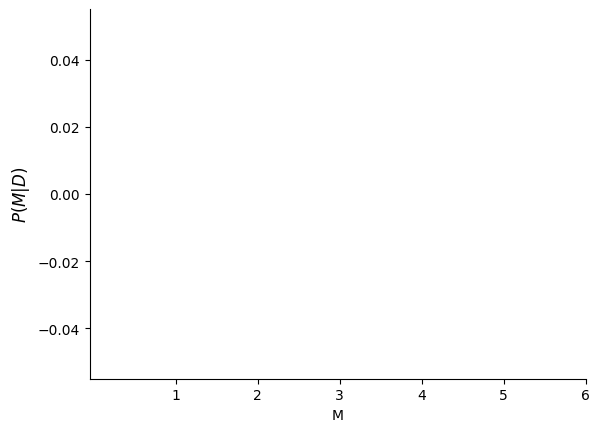

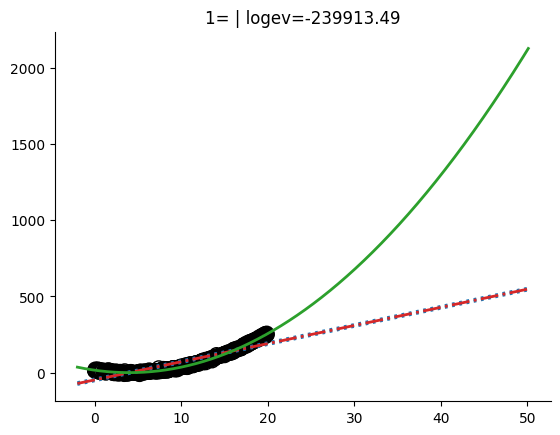

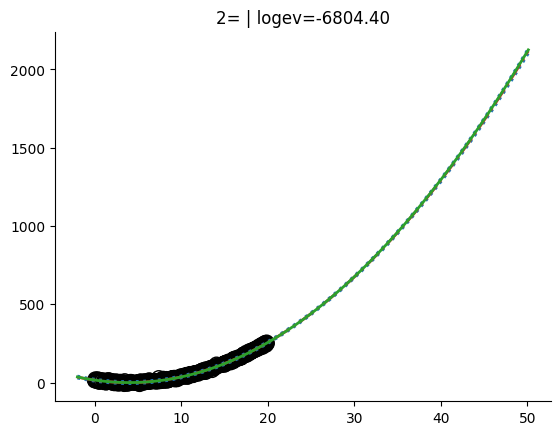

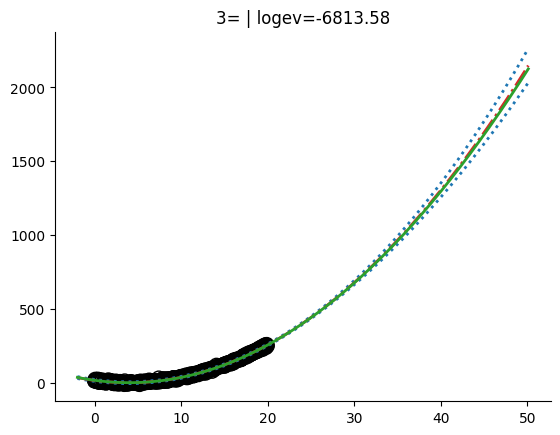

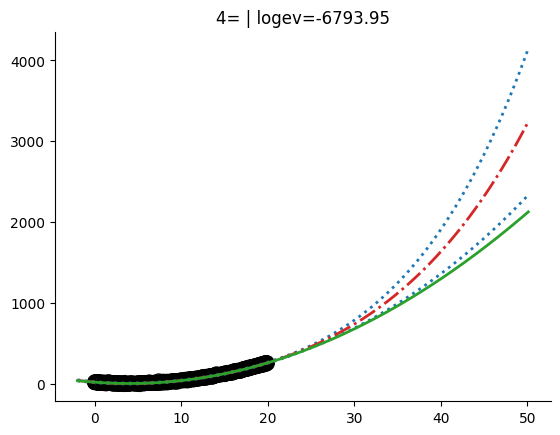

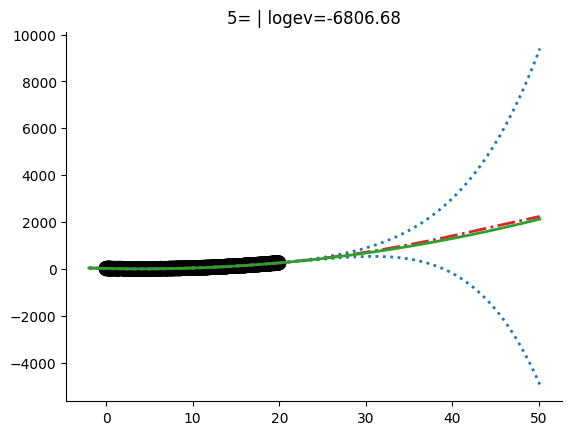

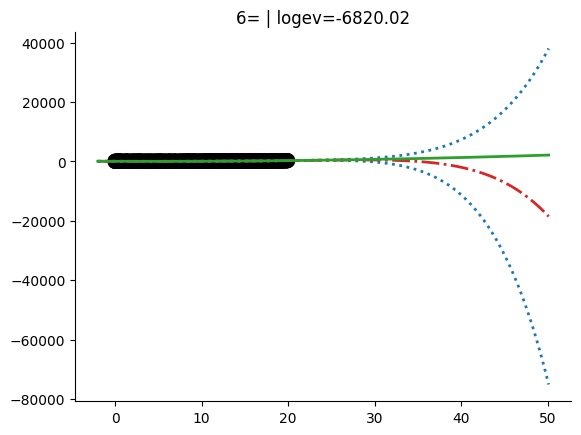

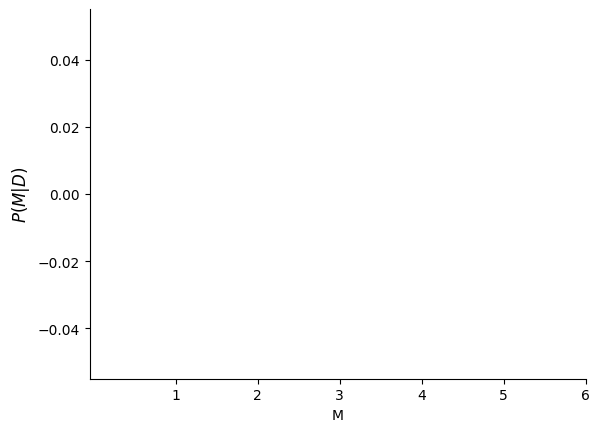

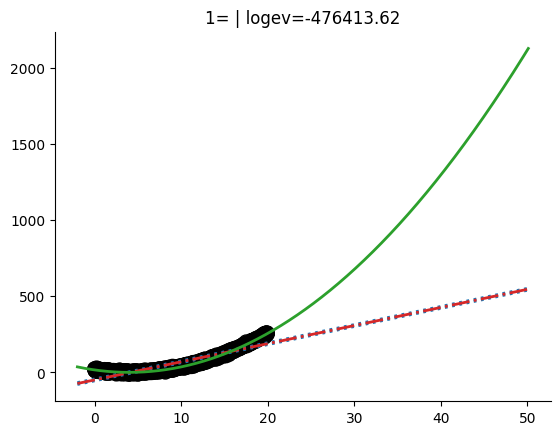

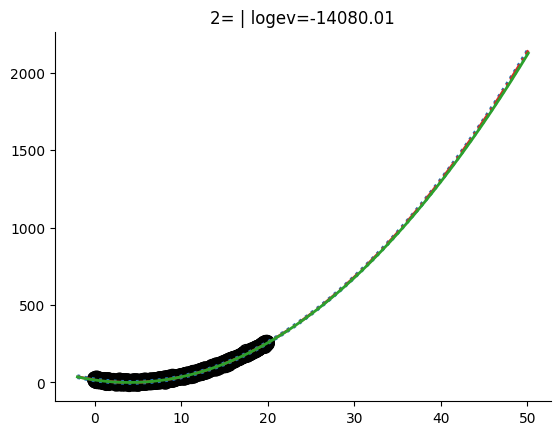

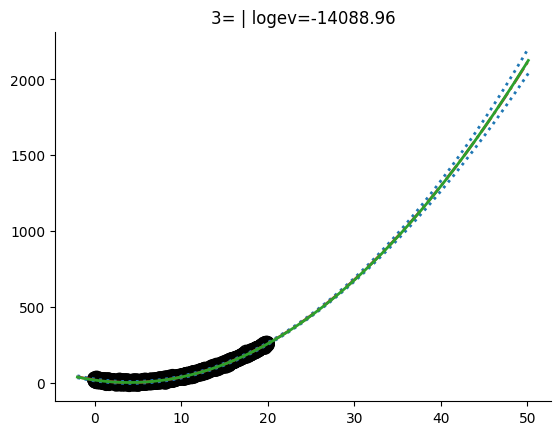

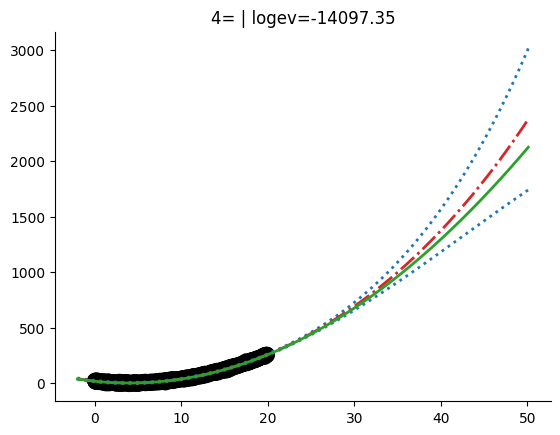

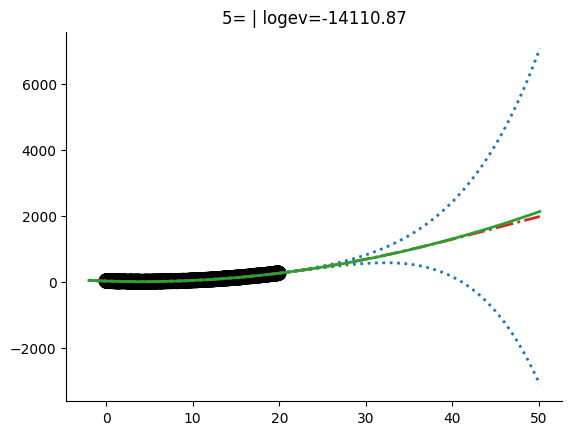

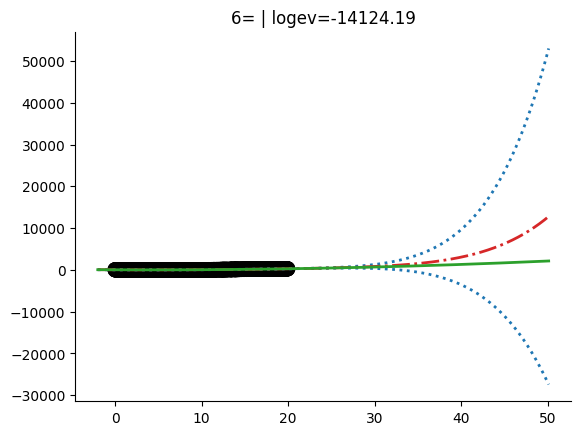

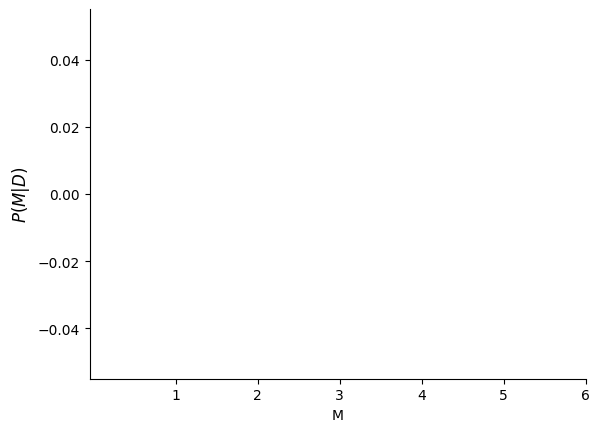

In [73]:
if __name__ == "__main__":
    plt.rcParams["axes.spines.right"] = False
    plt.rcParams["axes.spines.top"] = False
    alpha, beta = 0.01, 0.1
    N_values = [5, 30, 100, 500, 1000]
    deg_values = [1, 2, 3, 4, 5, 6]

    for N in N_values:
        logLs = []
        (x_train, y_train), (x_true, y_true) = generate_data(N, 1)
        for deg in deg_values:
            fig, ax = plt.subplots()

            pf = PolynomialFeatures(degree=deg)
            X_train = pf.fit_transform(x_train[:, None])
            mN, SN, logL = posterior_linreg(X_train, y_train, alpha, beta)
            
            X_true = pf.fit_transform(x_true[:, None])
            y_est_std = np.sqrt(1 / beta + np.einsum("nm,mk,nk->n", X_true, SN, X_true))
            y_est_mean = X_true @ mN
            logLs.append(logL)

            plt.plot(x_true, y_est_mean + 2 * y_est_std, c="tab:blue", linewidth=2, linestyle="dotted")
            plt.plot(x_true, y_est_mean - 2 * y_est_std, c="tab:blue", linewidth=2, linestyle="dotted")
            plt.plot(x_true, y_est_mean, c="tab:red", linestyle="-.", linewidth=2)
            plt.scatter(x_train, y_train, edgecolor="black", c="none", s=100)
            plt.plot(x_true, y_true, c="tab:green", linewidth=2)
            plt.title(f"{deg}= | logev={logL:0.2f}", fontsize=12)
            # pml.savefig(f"linreg-N{N}-d{deg}.pdf")

        fig, ax = plt.subplots()
        L_norm = np.exp(logLs)
        L_norm = L_norm / L_norm.sum()
        plt.bar(deg_values, L_norm)
        plt.xticks(deg_values)
        plt.xlabel("M")
        plt.ylabel(r"$P(M\vert D)$", fontsize=12)
        # pml.savefig(f"linreg-prob-model_N{N}.pdf")

    plt.show()